<a href="https://colab.research.google.com/github/bbalbo/test_mushrooms/blob/main/proyecto2_parte4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
import math
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
import matplotlib.pyplot as plt

In [120]:
df = pd.read_csv('/content/drive/MyDrive/mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [121]:
#Se verifica que no haya valores nulos
df.isna().sum().sum()

0

In [122]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [123]:
#No hay duplicados tampoco
df.duplicated().sum()

0

In [124]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [125]:
#Se separa en features y target. Target será si el hongo es venenoso o no.
X = df.drop(columns='class')
y = df['class']

In [126]:
ohe = OneHotEncoder()

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [128]:
X_train_transformed = ohe.fit_transform(X_train)
X_test_transformed = ohe.transform(X_test)

In [129]:
y_train.replace({'e':0, 'p':1}, inplace=True)
y_test.replace({'e':0, 'p':1}, inplace=True)

Train accuracy score:  1.0
Train recall score:  1.0
Train precision score:  1.0
-------------------------------------------------------------------------------------------
Test accuracy score:  1.0
Test recall score:  1.0
Test precision score:  1.0
--------------------------------------------------------------------------------------------


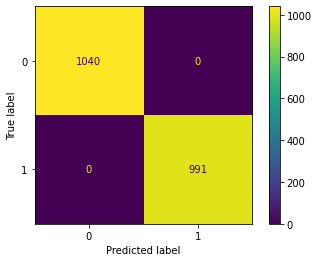

In [130]:
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train_transformed, y_train)
print('Train accuracy score: ',accuracy_score(y_train, dec_tree.predict(X_train_transformed)))
print('Train recall score: ',recall_score(y_train, dec_tree.predict(X_train_transformed)))
print('Train precision score: ',precision_score(y_train, dec_tree.predict(X_train_transformed)))
print('-------------------------------------------------------------------------------------------')
print('Test accuracy score: ',accuracy_score(y_test, dec_tree.predict(X_test_transformed)))
print('Test recall score: ',recall_score(y_test, dec_tree.predict(X_test_transformed)))
print('Test precision score: ',precision_score(y_test, dec_tree.predict(X_test_transformed)))
print('--------------------------------------------------------------------------------------------')
cm1=confusion_matrix(y_test, dec_tree.predict(X_test_transformed))
disp=ConfusionMatrixDisplay(cm1)
disp.plot()
plt.show()

Train accuracy score:  1.0
Train recall score:  1.0
Train precision score:  1.0
-------------------------------------------------------------------------------------------
Test accuracy score:  1.0
Test recall score:  1.0
Test precision score:  1.0
--------------------------------------------------------------------------------------------


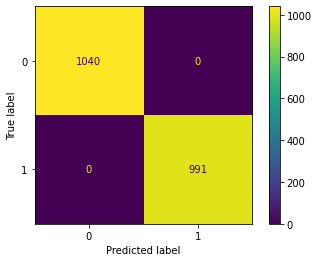

In [131]:
bag_tree = BaggingClassifier(random_state=42)
bag_tree.fit(X_train_transformed, y_train)
print('Train accuracy score: ',accuracy_score(y_train, bag_tree.predict(X_train_transformed)))
print('Train recall score: ',recall_score(y_train, bag_tree.predict(X_train_transformed)))
print('Train precision score: ',precision_score(y_train, bag_tree.predict(X_train_transformed)))
print('-------------------------------------------------------------------------------------------')
print('Test accuracy score: ',accuracy_score(y_test, bag_tree.predict(X_test_transformed)))
print('Test recall score: ',recall_score(y_test, bag_tree.predict(X_test_transformed)))
print('Test precision score: ',precision_score(y_test, bag_tree.predict(X_test_transformed)))
print('--------------------------------------------------------------------------------------------')
cm1=confusion_matrix(y_test, bag_tree.predict(X_test_transformed))
disp=ConfusionMatrixDisplay(cm1)
disp.plot()
plt.show()